# Forecasting Daily Temperature in Delhi, Note, add images to this note in here

Climatic condition is one of the crucial aspect of the environment which needs to be check or forecasted with accuracy in other to be in a good state or better condition. It must be constantly monitored because it affect our daily lives and if not properly monitored might cause a diaster which willl result in the lost of life and properties.

The difference between weather and climate is a measure of time. Weather is what conditions of the atmosphere are over a short period of time, and climate is how the atmosphere "behaves" over relatively long periods of time.

Government of every nation are every concerned with the Climatic condition of their state especially the state/country with extreme climatic condition. That is why Government and Environmental Scientist put in their resources to forecast the daily climatic condition accuractly.Thankfully, Machine Learning has provided various ways to predict or forecast climatic condition with the use of various model that learns from previous climatic condition and forcast climatic conditions in the future accuratly.

**Data type : This data is stored in a csv (comma separated file) format and it consist of train & test data.**

**Variables: The following are the variables;**

* Date : This is the date of each climatic condition.
* meantemp " This is the mean temperature averaged out from multiple 3 hour intervals in a day.
* humidity: This is the humidity  value for the day (units are grams of water vapor per cubic meter volume of air).
* wind_speed : This is the wind speed measured in kmph.
* meanpressure : This is the mean pressure reading of weather (measure in atmosphere (atm)).

## About this Project

This project is to accurately forecast the Daily temperature of Delhi in the future, the following are the steps taken to complete this project.
* Importing necessary libraries and the datasets
* Cleaning the dataset
* Performing EDA (Explorative Data Analysis)
* Forecasting and making prediction
* Deployment.

# Understanding the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Importing the train and test data
train_data = pd.read_csv("DailyDelhiClimateTrain.csv")
test_data = pd.read_csv("DailyDelhiClimateTest.csv")

# Reading the train data
train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# Reading the test data
test_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
# Getting the information of the data
"""
    Only the date column does not have the right datatype, therefore this will be corrected.
"""
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [5]:
# Checking for missing values
"""
    There are no missing values in both dataset.
"""
print(train_data.isna().sum())
print(test_data.isna().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


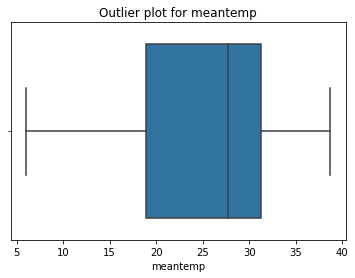

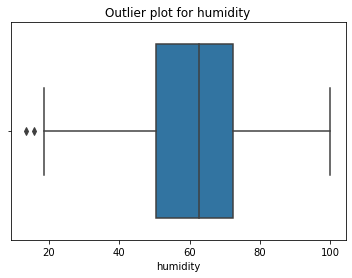

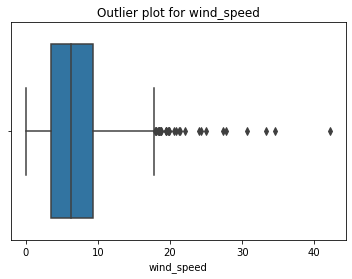

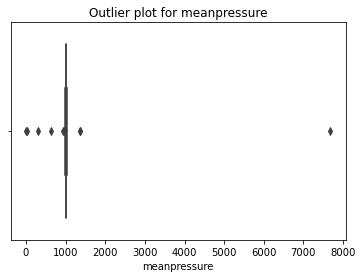

In [9]:
# Checking for outliers for each data
def plot_outliers(data):
    """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return outlier plots of each columns
    """
    for i in data.select_dtypes(exclude = "object"):
        plot = sns.boxplot(x = i, data = data) # box plot of each numerical columns in the data.
        if i == "meantemp":
            plt.title(f"Outlier plot for {i}")
        elif i == "humidity":
             plt.title(f"Outlier plot for {i}")
        elif i == "wind_speed":
             plt.title(f"Outlier plot for {i}")
        else:
             plt.title(f"Outlier plot for {i}")
        plt.show();
    return plot

plot_outliers(data = train_data);

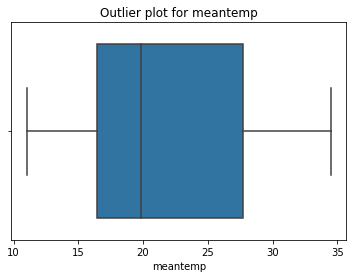

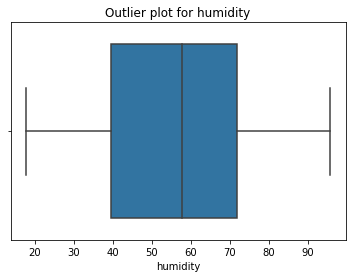

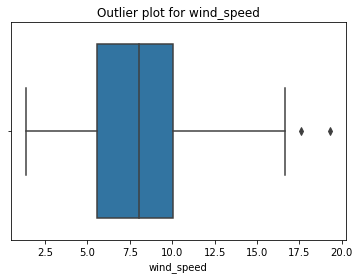

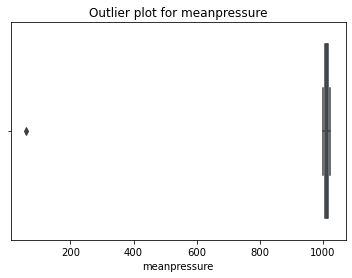

In [10]:
plot_outliers(test_data);

#### Note: The reason for this outlier is not farfetched as all the columns are measured in several unit, therefore the values will be larger than the others. But taking a closer look at the "meanpressure" column. It has the largest value, and research found it out that the highest atmospheric pressure humans can survive is 4 - 5atm, beyond this will cause a great problem for humans.

#### I think the data collection is in accuract or the measurement use to measure meanpressure is different from the one give in the data description.

# Solution to the problem.
**I will be removing the outliers from each columns and also convert the columns to the same scale during model building.**

In [11]:
# Analysis of the summary statistics
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [12]:
test_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


#### From the summary statistics we can see that there is ouliers in the wine_speed and meanpressure outlier because the max and the 75% quartile value is far apart.

# Data Cleaning

In [13]:
# Detecting an inserting new values for the outliers
def get_whisker(data):
     """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return the lower and higher whisker of each columns in the dataframe.
    """
    lower_whisker = []
    higher_whisker = []
    for i in ["wind_speed", "meanpressure"]:
        if i == "wind_speed":
            wind_q1, wind_q3 = data[i].quantile([0.25, 0.75])
            wind_iqr = wind_q3 - wind_q1
            lower_wind_whisker = wind_q1 - (1.5 * wind_iqr)
            higher_wind_whisker = wind_q3 + (1.5 * wind_iqr)
        
        else:
            pre_q1, pre_q3 = data[i].quantile([0.25, 0.75])
            pre_iqr = pre_q3 - pre_q1
            lower_pre_whisker = pre_q1 - (1.5 * pre_iqr)
            higher_pre_whisker =pre_q3 + (1.5 * pre_iqr)
     
   
    lower_whisker.append([lower_wind_whisker, lower_pre_whisker])
    higher_whisker.append( [higher_wind_whisker, higher_pre_whisker])
        
    return lower_whisker, higher_whisker
    
#note write the commenting, when you start another day
           

In [14]:
get_whisker(data = train_data)[1][0][1]

1034.991717575188

In [15]:
q1, q3 = train_data["wind_speed"].quantile([0.25, 0.75])
iqr = q3 - q1
w_q1 = q1 - (1.5 * iqr)
w_q1

-5.169852941176471

In [16]:
get_whisker(data =test_data)

([[-1.1942708333333334, 993.484375]], [[16.8265625, 1030.6927083333335]])

In [17]:
def fill_outlier(data):
     """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return a new data that is free from outliers.
    """
    for i in ["wind_speed", "meanpressure"]:
        if i == "wind_speed":
            data[i] = np.where(data[i] < get_whisker(data = data)[0][0][0], data[i].mean(), data[i])
            data[i] = np.where(data[i] > get_whisker(data = data)[1][0][0], data[i].mean(), data[i])
        else :
            data[i] = np.where(data[i] < get_whisker(data = train_data)[0][0][1], data[i].mean(), data[i])
            data[i] = np.where(data[i] > get_whisker(data = data)[1][0][1], data[i].mean(), data[i])
    return data
    

In [18]:
# filling the outliers in the train data
fill_outlier(data = train_data)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [19]:
train_data[train_data["wind_speed"] >= get_whisker(data = train_data)[1][0][0]]

,date,meantemp,humidity,wind_speed,meanpressure
56,2013-02-26,17.857143,70.000000,17.587500,1015.142857
76,2013-03-18,23.428571,58.142857,17.457143,1009.428571
141,2013-05-22,36.750000,22.125000,17.587500,998.625000
238,2013-08-27,32.142857,57.285714,17.071429,999.857143
345,2013-12-12,17.750000,62.375000,16.900000,1012.500000
535,2014-06-20,38.000000,36.125000,17.825000,991.375000
618,2014-09-11,26.571429,85.714286,17.825000,1005.571429
824,2015-04-05,23.571429,67.714286,17.600000,1007.750000
846,2015-04-27,30.125000,53.000000,17.587500,1006.750000
875,2015-05-26,35.250000,26.625000,17.125000,1001.500000


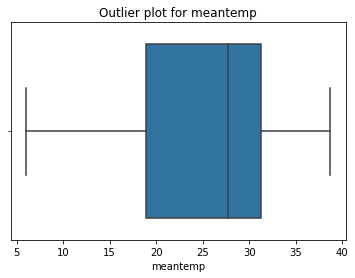

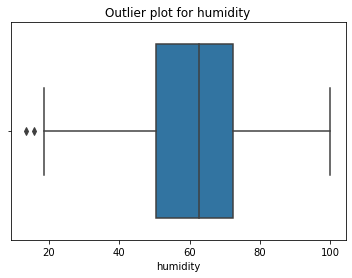

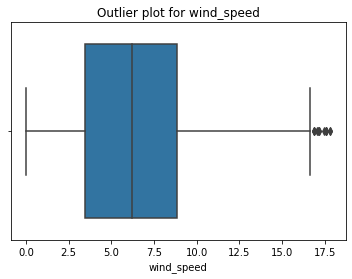

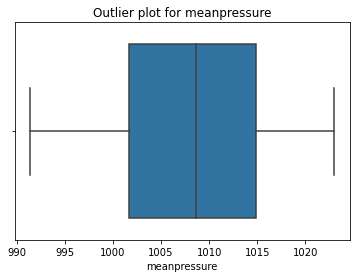

<AxesSubplot:title={'center':'Outlier plot for meanpressure'}, xlabel='meanpressure'>

In [20]:
# Reploting to check for the eradication of outliers
plot_outliers(data = train_data)

In [21]:
# filling the outliers inthe test data
fill_outlier(data = test_data)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,1004.035090
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


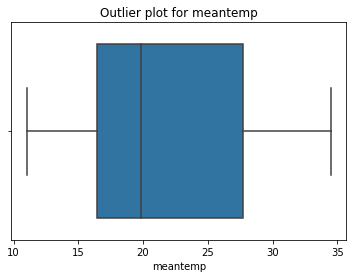

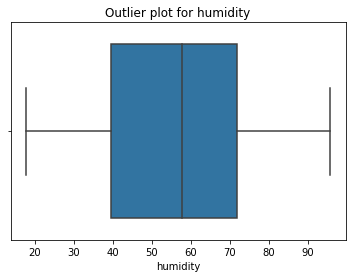

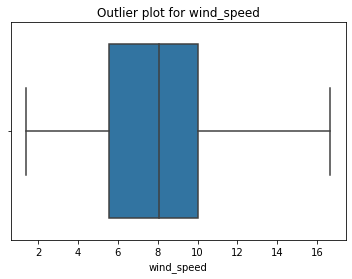

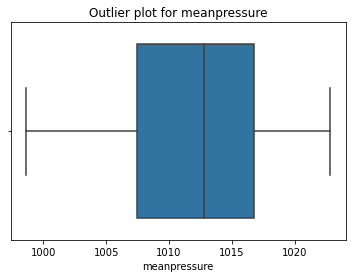

<AxesSubplot:title={'center':'Outlier plot for meanpressure'}, xlabel='meanpressure'>

In [22]:
# replotting to check for the removal of outliersi the test data
plot_outliers(data = test_data)

In [23]:
# Detecting duplicated data
print(train_data.duplicated().any())
print(test_data.duplicated().any())

False
False


# Explorative Data Analysis (EDA)

In [24]:
#Detecting the correlation between the data
def plot_corr(data):
     """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return a correlation map plot of each columns
    """
    cor = data.corr()
    fig = plt.figure(figsize=(16,8))
    plot = sns.heatmap(cor, annot=True)
    
    return plot

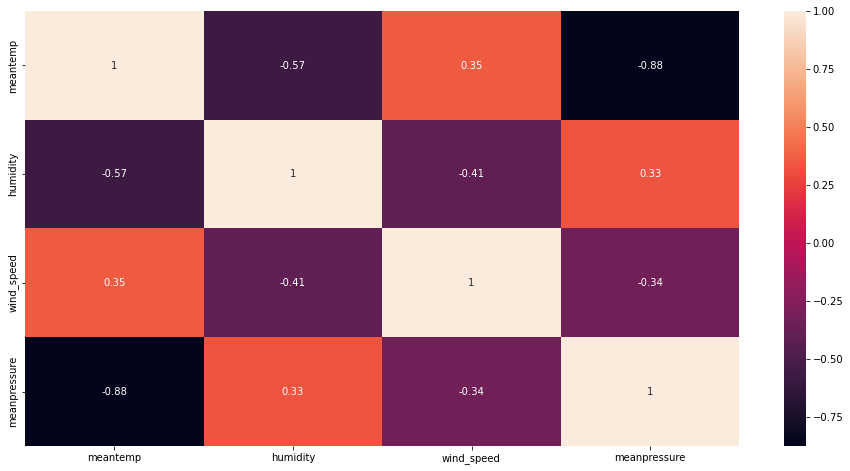

In [25]:
# plotting the correlation for the train data
plot_corr(data = train_data);

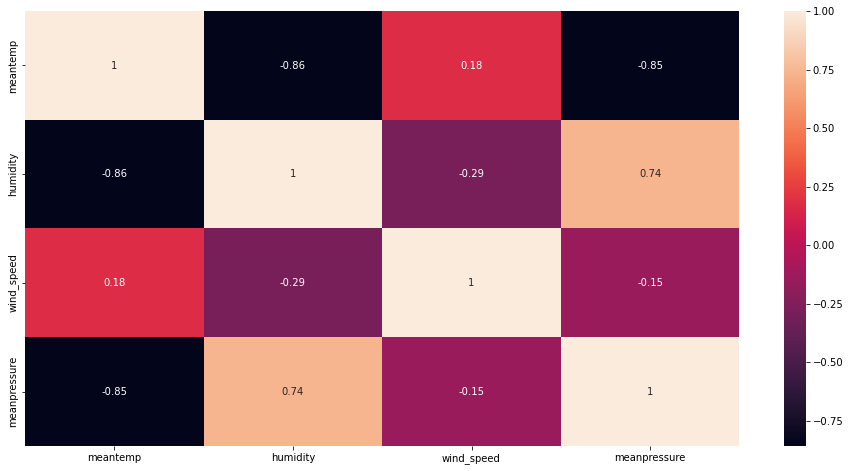

In [26]:
# plotting the correlation for the test data
plot_corr(data = test_data);

#### From the corrlation map of the train and test data, we can see that both data has the same sign for the relationship between variables although they do not have the same magnitude.

### I mostly pay more attention on the relationship between mean tempreature and other features because of the the regression model that  will be built in the model development. I will use it to compare the coefficiect of features in the regression model.

### We can see that humidity and  pressure has a strong negative corrlelation with temperatur and research found this out that it is true. Aldo the wind speed and temperatur has a positive but not too strin relationship with temperatur and this is also true.

# Understanding the seasonality of the data

In [27]:
data_train = train_data.copy()
data_test = test_data.copy()


def add_cols(data):
     """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return new data with additional columns, that is feature engineering.
    """
    data["date"] = pd.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["month_name"] = data["month"].replace({
        1 : "Jan",
        2 : "Feb",
        3 : "March",
        4 : "April",
        5 : "May",
        6 : "June",
        7 : "July",
        8 : "August",
        9 : "Sep",
        10 : "Oct",
        11 : "Nov",
        12 : "Dec"
    })
    data = data.set_index("date")

    return data
data_train = add_cols(data = data_train)

In [28]:
data_train.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,month_name
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,Jan
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,Jan
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,Jan
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,Jan
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,Jan


In [29]:
# adding new columns to the test data
data_test = add_cols(data = data_test)
data_test.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,month_name
date,,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,1004.035090,2017,1,1,Jan
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,2,Jan
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,3,Jan
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,4,Jan
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,5,Jan


In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int64  
 5   month         1462 non-null   int64  
 6   day           1462 non-null   int64  
 7   month_name    1462 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 102.8+ KB


In [31]:
data_train.year.unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Dehli Monthly Temperature each year')

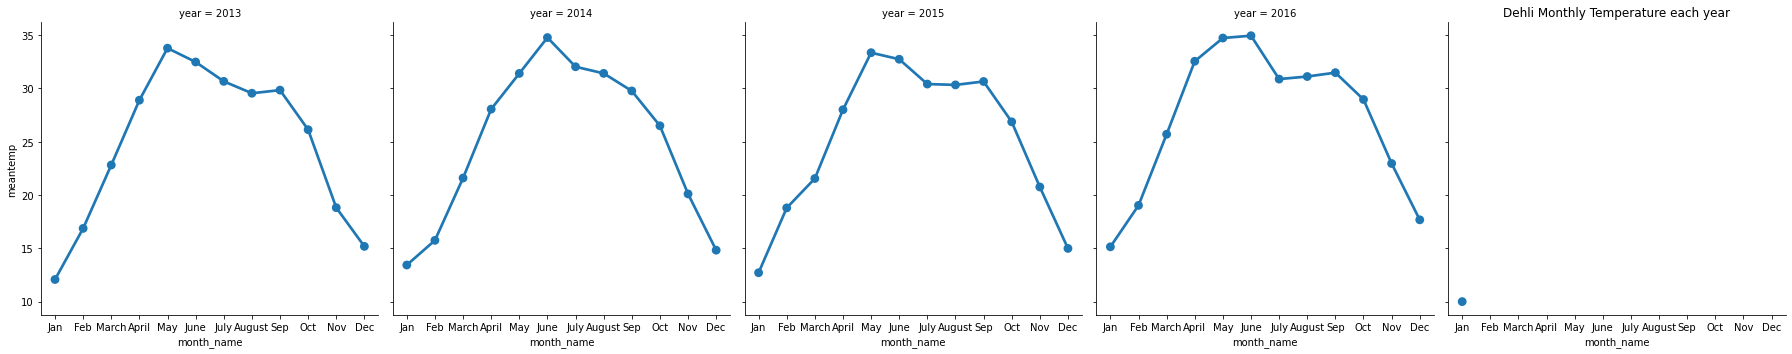

In [32]:
# Dehli daily Temperature for each month 
sns.factorplot(x = "month_name", y = "meantemp", data = data_train, ci = None, col = "year")
plt.title("Dehli Monthly Temperature each year") #Note i want to use this as the overhead title;

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


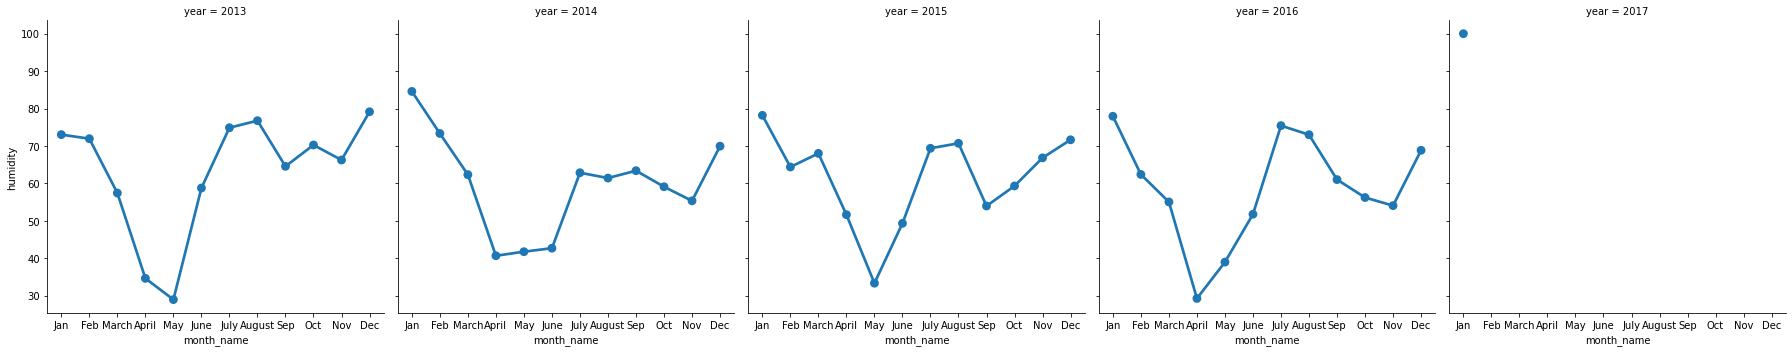

In [33]:
sns.factorplot(x = "month_name", y = "humidity", data = data_train, ci = None, col = "year")

#### From the graph above, we can deduce that the highest temperature for each year is May or June. Research confirms that this is true, May is the hottest month in Dehli. Also August the most humid month in Delhi.

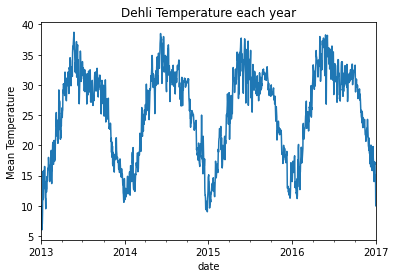

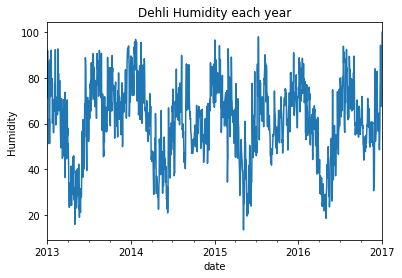

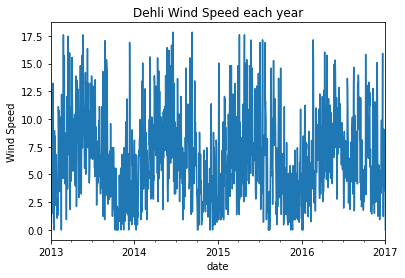

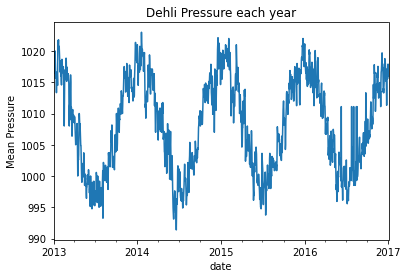

In [34]:
def line_plot(data):
     """
    paramneters:
    -----------
        data : This is a dataframe set fo data.
        
    output :
    -------
    It is to return line plots of each columns
    """
    cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
    for i in cols:
        plot = data[i].plot()
        
        if i == "meantemp":
            plt.ylabel("Mean Temperature")
            plt.title("Dehli Temperature each year")
            
        elif i == "humidity":
            plt.ylabel("Humidity")
            plt.title("Dehli Humidity each year")
        
        elif i == "wind_speed":
            plt.ylabel("Wind Speed")
            plt.title("Dehli Wind Speed each year")
            
        else:
            plt.ylabel("Mean Pressure")
            plt.title("Dehli Pressure each year")
        plt.show()
    return plot
line_plot(data= data_train);

#### We can see from the line plot above, that the temperature od Dehli is low as the beginning of each year but at the mid of the year is always high but this is opposite in the case of humidity and pressure, in which we can concude on the negative relationship temperature has with humidity and pressure and also detect the positive relationship between humidity and pressure.

#### Also there is a lot of noises in wind speed column. Therefore to have a clearer view of the wind speed column we can use the rolling funnction. With this we can see that there is a positive relationship between wind speed and temperature and neagitve relationship humidity and pressure.

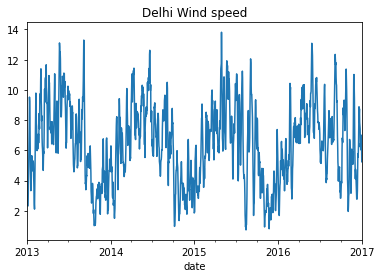

In [35]:
# Plottinf a smoothing graph for wind_speed
data_train["wind_speed"].rolling(window= 6).mean().plot()
plt.title("Delhi Wind speed");

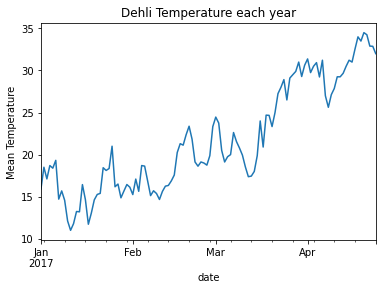

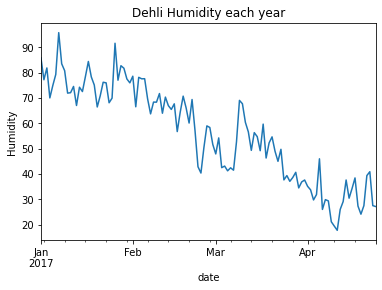

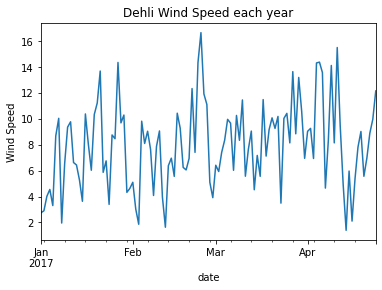

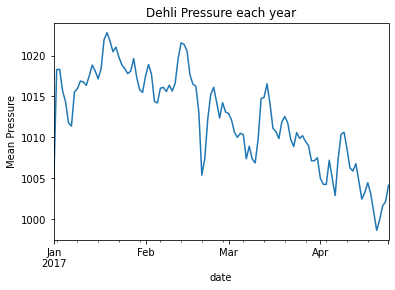

In [36]:
line_plot(data = data_test);

#### We can see that the test data also consist of year 2017, but the conclusion also follows the statement above, but to see a full picture we can concantenate the data.

In [37]:
all_data = pd.concat([data_train, data_test])
all_data.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,month_name
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,Jan
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,Jan
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,Jan
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,Jan
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,Jan


In [38]:
all_data.tail()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,month_name
date,,,,,,,,
2017-04-20,34.500,27.500000,5.562500,998.625000,2017,4,20,April
2017-04-21,34.250,39.375000,6.962500,999.875000,2017,4,21,April
2017-04-22,32.900,40.900000,8.890000,1001.600000,2017,4,22,April
2017-04-23,32.875,27.500000,9.962500,1002.125000,2017,4,23,April
2017-04-24,32.000,27.142857,12.157143,1004.142857,2017,4,24,April


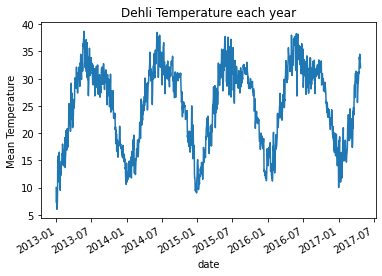

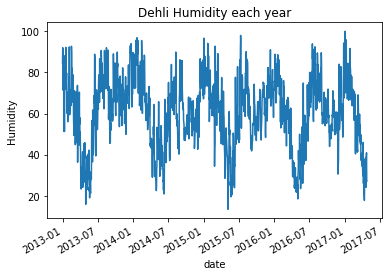

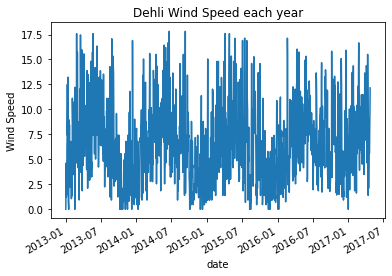

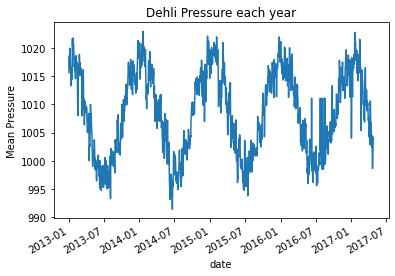

In [39]:
line_plot(data = all_data);

####  We can attest the vatiability each column for each year are mostly likeli the same

In [40]:
# know how to check for variablity
train_data.std()

C:\Users\HP\AppData\Local\Temp\ipykernel_13316\1239787342.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.std()


meantemp         7.348103
humidity        16.769652
wind_speed       3.861278
meanpressure     7.420606
dtype: float64


# Model Development
## Note: We can use two machine learning model type for this project¶
* Regression models : which will be predicting temperature, give the rest of the features
* Time serie model sucn as LMST, arima model, autocorrelation, grach, prophet etc. The model to use depends on the nature of data and specific goals. And our goal is to predict the daily temperation of Delhi.
 
## Regression Model Development
I will be using Linear Regression to predict the variable because it is easy to compute ant it is not computationally expensive. And also I will be using the root mean squared error (which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.) to estimate the metrics and the lower the rmse the better the performace of the model

In [42]:
# Using simple linear regression to predict the temperature of delhi
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score 

In [43]:
# copy the data into another var
train = train_data.copy()
test = test_data.copy()

# Dropping the date column
train = train.drop(columns = "date")
test = test.drop(columns = "date")

# Splitting the data into features ans target
X_train = train.drop(columns = "meantemp")
y_train = train["meantemp"]

X_test = test.drop(columns = "meantemp")
y_test = test["meantemp"]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1462, 3), (114, 3), (1462,), (114,))

In [44]:
# instatiating the model
model = make_pipeline(StandardScaler(),
                      LinearRegression())

#fitting the model
model.fit(X_train, y_train)

# Predicting the train data
train_pred = model.predict(X_train)

# Estimating the error ansd the coefficient of determination of the train data
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_corr_det = r2_score(y_train, train_pred)

# Predicting the test data
test_pred = model.predict(X_test)

# Estimating the error ansd the coefficient of determination of the test data
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_corr_det = r2_score(y_test, test_pred)

print(f"The rmse of the train data is {round(train_rmse, 2)}")
print(f"The rmse of the test data is {round(test_rmse, 2)}")
print(f"The coefficient of determination of the train data is {round(train_corr_det, 2)}")
print(f"The coefficient of determination of the test data is {round(test_corr_det, 2)}")

The rmse of the train data is 2.77
The rmse of the test data is 2.99
The coefficient of determination of the train data is 0.86
The coefficient of determination of the test data is 0.78


### We can see from the estimate above that the rmse for the train and test data are almost the same which means that the model performed well both on the seen ans unseen data and this nullify the problem of overfitting and underfittng.

In [45]:
coef = model.named_steps["linearregression"].coef_
features = model.named_steps["standardscaler"].feature_names_in_
dict_coef = {"Features" : features,
             "Coeefficient" : coef}
coef_dt = pd.DataFrame(dict_coef)
coef_dt

,Features,Coeefficient
0,humidity,-2.445890
1,wind_speed,-0.367583
2,meanpressure,-5.744386


### From the coefficient table above, we can see that the signs (+ or -) of the estimate (coefficient) values of each features tallys wiht the correlation signs except for wind_speed.

# Time Series Prediction

### I will be using two models to forecast Delhi climatic condition, which are:
* ### ARIMA.
* ### LSTM.

# ARIMA

### ARIMA stands for Auto-Regressive Integrated Moving Averages, it is a widely stastical model used for forecasting and analyzing time series data, mostly univariate analysis. It comprise of three major components, such as :

* #### AR  :  Auto-Regressive is models the atocorrelation in the time series data. It is captures the relationship between the current values of a time series  and the past occurencies (that is, it's lags). The order of AR component which is denoted as "p", represent how many past values are considered for prediction.

* #### I : The "I" components of ARIMA is the integration and this indicate that the time series data has been differneced to test for stationarity. Stationarity means that the time series data such as the mean and variance does not changes over time but in most case in time series it does changes and the solution is to difference denoted as "d", the time series data in order to remove the non-stationarity.

* #### MA : This component of ARIMA is the Moveing Average ant this models the moving average pf white noise or error term (this the difference between actual values and predicted values). The order of MA component which is denoted as "q", determines how manu past errors are considered for prediction.

### Therefore, the ARIMA model combines AR, I & MR to create a robust model for forecasting time series data, it is donoted as ARIMA(p,I,q), where :

* #### p is the order of Auto-Regressive component.
* #### I is the order of differencing.
* #### q is the order of Moving Average components

In [58]:
cols =["humidity", "wind_speed", "meanpressure"]
train_data["date"] = pd.to_datetime(train_data["date"])
time_series_data = train_data.set_index("date").drop(cols, axis = 1)
time_series_data

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [59]:
# Importing the Augumented dickey fuller to know if the data is stationary or not
from statsmodels.tsa.stattools import adfuller

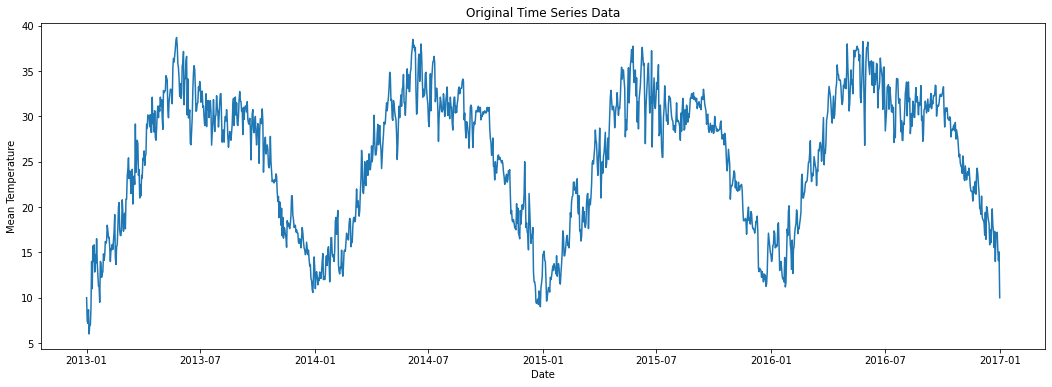

In [111]:
#plotting the time series data
plt.figure(figsize = (18, 6))
plt.plot(time_series_data)
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Mean Temperature");

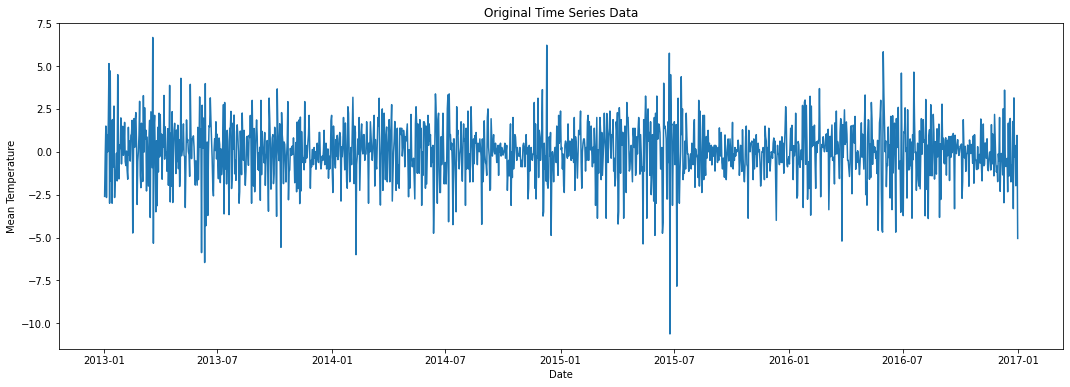

In [136]:
plt.figure(figsize = (18, 6))
plt.plot(time_series_data.diff().dropna())
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Mean Temperature");

# Augumented Dickey Fuller Test(ADF)

ADF is used to check for the stationarity of the time series data and it is cognizant to establish the stationary in the data to check ifthe mean and variance of the data is contant. 

The hypothesis test is has follow:

H0 : There is unit root, that is, there is no stationary in the variable <br/>
H1 : There is no unit root, that is, there is stationary in the variable

The decision rule is that, if the absolute value of ADF test statistics is less than the absolute critical value at 5% level of signficance, accept the H0 and conclude that there is no stationary in the variable, but if the absolute value of ADF test statistics is greater than the absolute critical value at 5% level of significant, accept the H1 and conclude that there is stationary in the variable.


In [132]:
# Checking for stationarity in the data
results = adfuller(time_series_data, autolag = "AIC", regression = "ct", maxlag = 2)
print(f"ADF Value: {results[0]}")
print(f"P-Value: {results[1]}")
print(f"Lag Used: {results[2]}")
print(f"Number of Observations: {results[3]}")
print("Critical Values:")
for i, j in results[4].items():
    print(f"{i} : {j}")

ADF Value: -3.4318710480997114
P-Value: 0.04727311060345126
Lag Used: 2
Number of Observations: 1459
Critical Values:
1% : -3.9649884013715373
5% : -3.413503443864714
10% : -3.1288240237918568


In [110]:
# Converting to a dataframe
adf_values = {"ADF" : results[0],
              "P-Values" : results[1],
              "Number of Lags" : results[2],
              "1% Critical Value" : list(results[4].values())[0],
              "5% Critical Value" : list(results[4].values())[1],
              "10% Critical Value" : list(results[4].values())[0]}
pd.DataFrame(adf_values, index= ["values"]).T

,values
ADF,-3.431871
P-Values,0.047273
Number of Lags,2.000000
1% Critical Value,-3.964988
5% Critical Value,-3.413503
10% Critical Value,-3.964988


### Conclusion on ADF
From the table above we can see that the absolute value of ADF is greater the value at 5% critical level, therefore the data is stationary. There is no need for differencing.

# Determining the value of p and q

To determine the value of p and q, we have to plot the pacf and acf respectively.

* The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part(that is p). Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit. 
<br/>

* The autocorrelation function plot will tell us how much moving average is required to remove the autocorrelation from the stationary time series. This will determine the value of q

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


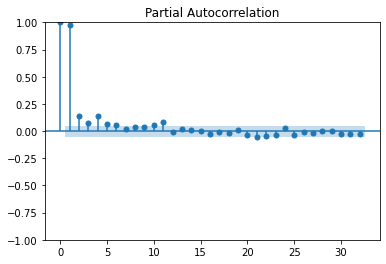

In [129]:
# finding the vlaue of p
plot_pacf(time_series_data["meantemp"]);

### Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit  so we can select the order of the p as 2. 

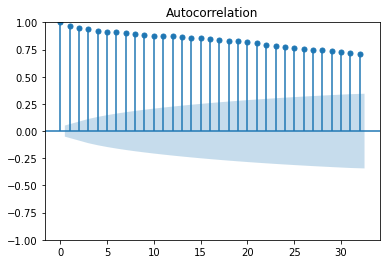

In [133]:
# finding the value of q
plot_acf(time_series_data["meantemp"]);

### Here, we can see that all lags are significantly out of the limit, therefore to determine q is quite difficult but i will be sticking at 2 and also the cannot difference the data because it gives alot of noises.

In [211]:
#Building the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima_model import SARIMA
model = ARIMA(time_series_data.meantemp, order = (1, 0, 1))
result = model.fit()
print(result.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2797.106
Date:                Sat, 23 Sep 2023   AIC                           5602.211
Time:                        23:55:02   BIC                           5623.361
Sample:                    01-01-2013   HQIC                          5610.101
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1435      2.192     11.013      0.000      19.847      28.440
ar.L1          0.9862      0.004    227.285      0.000       0.978       0.995
ma.L1         -0.2057      0.021     -9.820      0.0

From the model above, using the p-value, we can see that the coefficient are statistically significant, since the p-value is less that and 0.05 nd the z-score is either greater than 2 or less than -2. Also with a log-likelihood of -2770,it means that the model performs well but this itself doesn't justify the performance of the model, therefore, we have to forcast the model and run root mean squared error on the model.

In [212]:
# Forecasting the model
forecast = result.forecast(steps = 114)
forecast

2017-01-02    11.240936
2017-01-03    11.419340
2017-01-04    11.595277
2017-01-05    11.768782
2017-01-06    11.939888
                ...    
2017-04-21    21.314971
2017-04-22    21.354082
2017-04-23    21.392651
2017-04-24    21.430688
2017-04-25    21.468198
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [177]:
test_time_series_data["date"] = pd.to_datetime(test_time_series_data["date"])
test_time_series_data = test_data.drop(cols, axis = 1).set_index("date")
test_time_series_data

KeyError: 'date'

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
error = np.sqrt(mean_squared_error(forecast, test_time_series_data))
error

5.881485451896987

We can see that the rmse is very low, that means the model forecasted the values close to the origninal test data

Text(0.5, 1.0, 'Forecast Data')

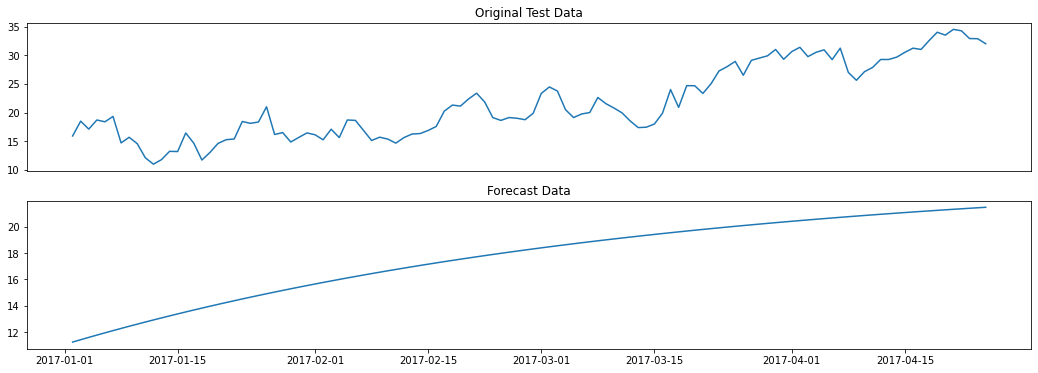

In [214]:
# plotting the forecast and the test data
fig, (ax1, ax2) = plt.subplots(2, figsize = (18, 6))
ax1.plot(test_time_series_data)
ax1.set_title("Original Test Data")
ax1.axes.xaxis.set_visible(False)

ax2.plot(forecast)
ax2.set_title("Forecast Data")

From the graph above, we can see that the forecast and the test data are almost the same, just that hte original test data has some fluctustions while the forecast is smooth. This is why we will try another model which is LSTM.